# Data Stories

# 1. Introduction


The relation between global energy consumption and global warming is a pressing and sensitive topic. Global warming is an unstoppable problem and as a society it is crucial to research and discuss the effects of human influence on the global climate: specifically the effects of our global energy consumption. We are going to look at different types of energy, using two datasets.

Our first perspective assumes that there is a strong relationship between global energy usage and global warming, explained by figures showing the average temperatures of all the different countries. As energy consumption continues to rise, predominantly fueled by fossil fuels, greenhouse gas emissions increase, contributing to the warming of the planet. Visualizing the data can highlight the alarming trends and emphasize the urgent need for sustainable energy alternatives to mitigate the impacts of global warming. 

The second perspective is contradictive to the first one. While there may be a correlation between global energy usage and global warming, it is essential to consider other factors influencing climate change. Visualizing the data can help identify the complex dynamics involved, such as natural climate variability and other human activities. Additionally, exploring energy-efficient technologies and policies can provide a more comprehensive approach to addressing climate change rather than solely focusing on energy usage as the sole cause. We’re going to visualize both of these perspectives in the following notebook.


# 2. Data and  Preprocessing

### 2.1 Programma

In the project all of the typing has been done in a jupyter notebook. The editing of the notebook has been done in visual studio code, an editing program made by Microsoft. In order to have the most up to date version for every participant of this project Github has been used to easily push and pull the files. For the coding library's such as plotly for visualising the code and pandas for easily being able to filter data have been used to make the project easier for both us and other researchers trying to use our project.

### 2.2 Preprocessing

To visualise data a lot of irrelevent data has been filtered, for the world maps two new files are created with only the relevant data for the years of choice and the corresponding data for every country. This has been done for the years 1950 and 2010, filtered from "GlobalLandTemperaturesByCountry.csv".  A table combining the Average Temperature from Dataset 1 and the fossil fuel consumption from Dataset 2 are created to speed up the process and to maintain oversight. 

The preprocessing steps for "WorldEnergyConsumption.csv" involve the following:

First:
Removing rows with NaNs (rows where there is no given data): Rows with more than half of the columns containing missing values (NaNs) are dropped to ensure data completeness. \

Second:
Identifying Columns with the Least NaNs: The number of NaN values in each column is calculated, and the top 10 columns with the least NaNs are selected. \

Third:
Cleaning the Dataset: The dataset is then cleaned based on the selected columns, resulting in a subset of data with reduced missing values. \

Fourth:
Calculating Percentage of NaN Values: The percentage of NaN values is calculated for each column, and the results are stored in a DataFrame. \

Fifth:
Saving the NaN Percentage Data: The NaN percentage DataFrame is saved as a text file named "nan_percentages.txt" for further analysis. \

Overall, these preprocessing steps ensure that the data used in the analysis is clean, relevant, and representative of recent temperature trends and energy consumption patterns.


### 2.3 Datasets information

The analysis involves 4 datasets: "WorldEnergyConsumption.csv", "GlobalLandTemperaturesByCountry.csv", "GlobalTemperatures.csv" and two smaller datasets created from "WorldEnergyConsumption.csv", "GlobalLandTemperaturesByCountry.csv" and "annual-change-forest-area.csv". "average_temperatures_1950.csv", "average_temperatures_2010.csv" Here is the information about each dataset and the preprocessing steps performed:

*Dataset 1: GlobalLandTemperaturesByCountry.csv*

**Variables**: The dataset contains the following variables: Date, AverageTemperature, AverageTemperatureUncertainty, Country.

**Download**: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?resource=download

**Data Preprocessing**: Since the goal is to maintain accuracy, the data used from this dataset is limited to records starting from 1950 onwards. This step ensures that the analysis focuses on recent temperature trends and avoids potential inaccuracies from earlier periods. The data starts from the 1700 and in that time the tools used for measuring 

*Dataset 2: World Energy Consumption*

**Variables**: The dataset includes information about energy usage per country per year, with separate tables for different forms of energy consumption (fossil, wind, etc.).

**Download**: https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption/code


*Dataset 3: Annual Forest Change*

**Variables**: The dataset involves information about the net forest change in 1990, 2000, 2010 and 2015 for 132 countries.

**Download**: https://www.kaggle.com/datasets/chiticariucristian/deforestation-and-forest-loss

### 2.4 Code for the preprocessing

This code are all of the library's and files we are using for the rest of this project.

In [1]:
import pandas as pd
import plotly.subplots as sp
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px


#Read the CSV file into a pandas DataFrame
annual_forest_change = pd.read_csv('annual-change-forest-area.csv')
world_energy_consumption = pd.read_csv('WorldEnergyConsumption.csv')
global_land_temperatures_by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
global_temperatures = pd.read_csv("GlobalTemperatures.csv")

In [2]:

# Calculate the threshold for the number of non-null values required
threshold = len(world_energy_consumption.columns) /2

# Remove rows with more than half of the columns containing NaNs
cleaned_worldenergy = world_energy_consumption.dropna(thresh = threshold)
print(len(world_energy_consumption))
print(len(cleaned_worldenergy))

17432
4278


In [3]:
# Step 1: Calculate the number of NaN values in each column
nan_counts = {col: world_energy_consumption[col].isna().sum() for col in world_energy_consumption.columns}

# Step 2: Sort the dictionary based on the count of NaN values in ascending order
sorted_nan_counts = sorted(nan_counts.items(), key=lambda x: x[1], reverse=False)

# Step 3: Extract the top 20 columns with the least NaNs
top_10_columns = [col for col, _ in sorted_nan_counts[:10]]

# Step 4: Clean the dataset based on the selected columns
worldenergycons_clean = world_energy_consumption.dropna(subset=top_10_columns)

# Print the number of rows after cleaning
print("Number of rows after cleaning:", len(worldenergycons_clean))

print(worldenergycons_clean.head(10))

Number of rows after cleaning: 3315
   iso_code      country  year  coal_prod_change_pct  coal_prod_change_twh  \
81      AFG  Afghanistan  1981                 5.042                 0.035   
82      AFG  Afghanistan  1982                16.000                 0.116   
83      AFG  Afghanistan  1983                 0.000                 0.000   
84      AFG  Afghanistan  1984                 2.069                 0.017   
85      AFG  Afghanistan  1985                 2.027                 0.017   
86      AFG  Afghanistan  1986                 5.960                 0.052   
87      AFG  Afghanistan  1987                 4.375                 0.041   
88      AFG  Afghanistan  1988               -17.365                -0.168   
89      AFG  Afghanistan  1989                -7.971                -0.064   
90      AFG  Afghanistan  1990               -17.323                -0.128   

    gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
81                  NaN             

In [4]:
# Calculate the percentage of NaN values per column
nan_percentages = (world_energy_consumption.isna().sum() / len(world_energy_consumption)) * 100

# Create a new DataFrame to store the results
nan_percentage_df = pd.DataFrame({'Column': nan_percentages.index, 'Percentage of NaNs': nan_percentages.values})

# Sort the DataFrame based on the percentage of NaNs in ascending order
nan_percentage_df = nan_percentage_df.sort_values('Percentage of NaNs', ascending=True)

# Save the DataFrame as a text file
nan_percentage_df.to_csv('nan_percentages.txt', sep='\t', index=False)

print("nan_percentages.txt file has been saved.")

nan_percentages.txt file has been saved.


In [5]:
average_temperatures_2010 = global_land_temperatures_by_country[global_land_temperatures_by_country['dt'].str[:4] == '2010'].groupby('Country')['AverageTemperature'].mean()

average_temperatures_2010_df = pd.DataFrame(average_temperatures_2010, columns=['AverageTemperature'])

average_temperatures_2010_df['Country'] = average_temperatures_2010_df.index

average_temperatures_2010_df.reset_index(drop=True, inplace=True)

print(average_temperatures_2010_df)

selected_columns = ['year', 'fossil_fuel_consumption']
selected_data = world_energy_consumption[selected_columns]

# Calculate the average values by grouping the data by 'year'
fossil_average_df = selected_data.groupby('year').mean().reset_index()

# Remove rows with NaN values
fossil_average_df = fossil_average_df.dropna()

# Print the DataFrame
print(fossil_average_df)

     AverageTemperature         Country
0             15.828667     Afghanistan
1             25.472500          Africa
2             13.775417         Albania
3             25.215667         Algeria
4             27.453417  American Samoa
..                  ...             ...
238           24.114250  Western Sahara
239           27.302750           Yemen
240           22.267500          Zambia
241           21.986250        Zimbabwe
242            4.861917           Åland

[243 rows x 2 columns]
     year  fossil_fuel_consumption
65   1965              1463.270000
66   1966              1535.974014
67   1967              1590.085638
68   1968              1691.887739
69   1969              1806.927333
70   1970              1915.946783
71   1971              1952.002314
72   1972              2053.336743
73   1973              2168.701271
74   1974              2141.871429
75   1975              2122.384443
76   1976              2246.763971
77   1977              2310.726614
78   1

In [6]:
# Convert the 'dt' column in 'global_temperatures' to datetime format
global_temperatures['dt'] = pd.to_datetime(global_temperatures['dt'])

# Extract the year from the 'dt' column in 'global_temperatures'
global_temperatures['year'] = global_temperatures['dt'].dt.year

# Select the relevant columns from 'global_temperatures'
selected_columns = ['year', 'LandAverageTemperature']
selected_temperatures = global_temperatures[selected_columns]

# Filter the selected temperatures for the years 1965 to 2015
filtered_temperatures = selected_temperatures[(selected_temperatures['year'] >= 1965) & (selected_temperatures['year'] <= 2015)]

# Calculate the average 'LandAverageTemperature' for each year
average_temperatures = filtered_temperatures.groupby('year').mean().reset_index()

# Merge 'fossil_average_df' with 'average_temperatures' based on the 'year' column
merged_data = pd.merge(fossil_average_df, average_temperatures, on='year')

# Print the merged DataFrame
print(merged_data)

    year  fossil_fuel_consumption  LandAverageTemperature
0   1965              1463.270000                8.527417
1   1966              1535.974014                8.599333
2   1967              1590.085638                8.700083
3   1968              1691.887739                8.516333
4   1969              1806.927333                8.595083
5   1970              1915.946783                8.700917
6   1971              1952.002314                8.599250
7   1972              2053.336743                8.499583
8   1973              2168.701271                8.948250
9   1974              2141.871429                8.467500
10  1975              2122.384443                8.744833
11  1976              2246.763971                8.347250
12  1977              2310.726614                8.850250
13  1978              2367.972257                8.692750
14  1979              2444.388543                8.733417
15  1980              2400.636429                8.980333
16  1981      

# 3. Visualizations

0.8858581401955268


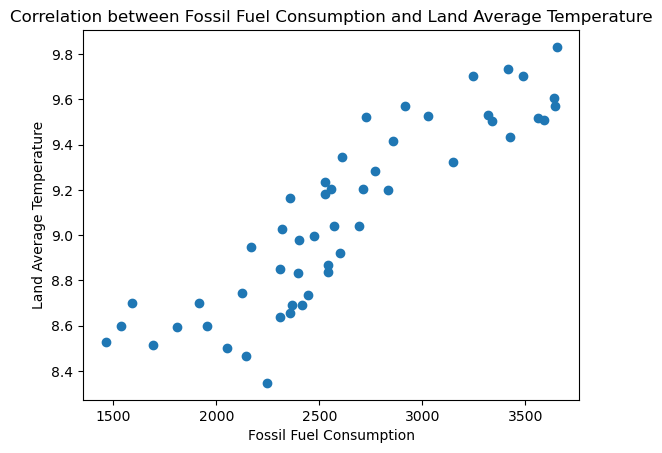

In [7]:
# Plot the correlation between 'fossil_fuel_consumption' and 'LandAverageTemperature'
plt.scatter(merged_data['fossil_fuel_consumption'], merged_data['LandAverageTemperature'])
plt.xlabel('Fossil Fuel Consumption')
plt.ylabel('Land Average Temperature')
plt.title('Correlation between Fossil Fuel Consumption and Land Average Temperature')


# print correlation coefficient
print(merged_data['fossil_fuel_consumption'].corr(merged_data['LandAverageTemperature']))

# Show the plot
plt.show()

Figure 1: \
A scatter plot with on the x-axis fossil fuel consumption starting at 1500 adding 500 till 3500. On the y-axis the land average temperatures starting at 8.4 adding 0.2 till 9.8. Measurement in degress for the y-axis.

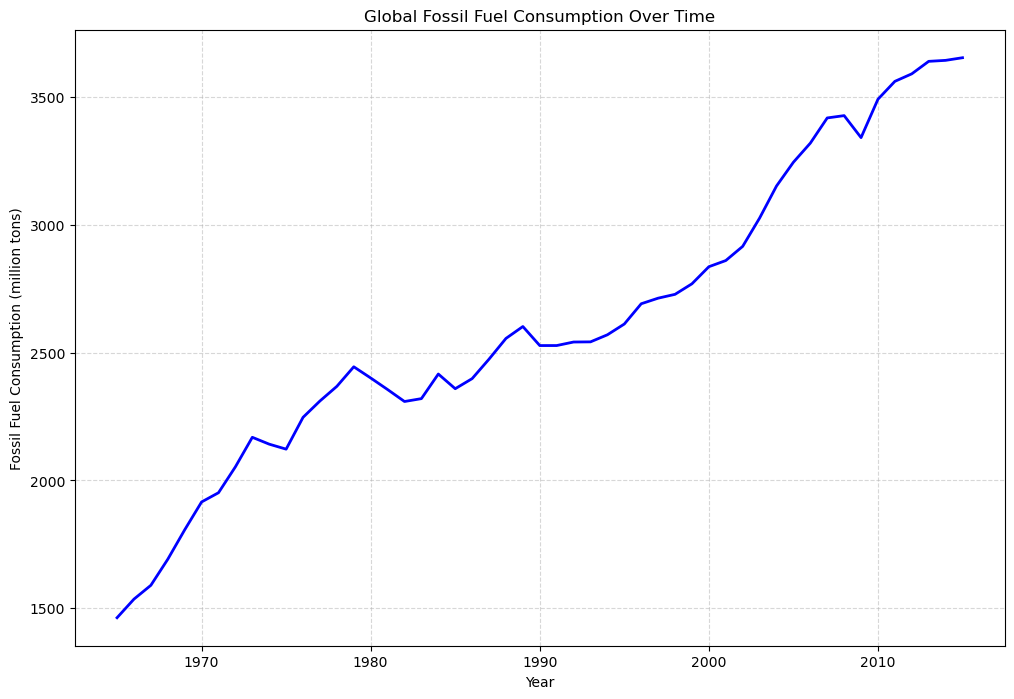

In [8]:
# Prepare the data for the line plot
years = merged_data['year']
fossil_fuel_consumption = merged_data['fossil_fuel_consumption']

# Create the line plot
plt.figure(figsize=(12, 8))
plt.plot(years, fossil_fuel_consumption, color='b', linewidth=2)

# Set the title and axes labels
plt.title('Global Fossil Fuel Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Fossil Fuel Consumption (million tons)')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

Figure 2: \
A line graph with on the x-axis the years starting from 1960 adding up by 10 till 2020. On the y-axis is the total fossil fuel consumption starting at 1500 adding 500 till 3500. The y-axis is given in million tons.

In [9]:
layout = go.Layout(
    xaxis=go.layout.XAxis(
        type='category' # the type for the x axis is categorical
    ),
    yaxis=go.layout.YAxis(
        tickformat=',.0%', # show as percentage
    ),
    height=400
)

trace = [go.Bar(name = 'Coal', marker_color='rgb(102,194,165)', x = worldenergycons_clean['year'], y = worldenergycons_clean['coal_share_energy'] / 1000), 
        go.Bar(name="Gas", marker_color='rgb(252,141,98)', x=worldenergycons_clean['year'], y=worldenergycons_clean['gas_share_energy'] / 1000), 
        go.Bar(name='Oil', marker_color='rgb(141,160,203)', x=worldenergycons_clean['year'], y=worldenergycons_clean['oil_share_energy'] / 1000),
        go.Bar(name='Nuclear', marker_color='rgb(133, 254, 212)', x=worldenergycons_clean['year'], y=worldenergycons_clean['nuclear_share_energy'] / 1000),
        go.Bar(name='Solar', marker_color='yellow', x=worldenergycons_clean['year'], y=worldenergycons_clean['solar_share_energy'] / 1000),
        go.Bar(name='Wind', marker_color='lightblue', x=worldenergycons_clean['year'], y=worldenergycons_clean['wind_share_energy'] / 1000),
        go.Bar(name='Hydro', marker_color='pink', x=worldenergycons_clean['year'], y=worldenergycons_clean['hydro_share_energy'] / 1000),
        go.Bar(name='Renewables', marker_color='darkgreen', x=worldenergycons_clean['year'], y=worldenergycons_clean['renewables_share_energy'] / 1000),
        ]

fig = go.Figure(data=trace, layout=layout)
fig.update_layout(title_text='Share of electricity consumption per energy source per year', xaxis_title='Year', yaxis_title="Percentage electricity consumption")
fig.show()

Figure 3: \
On the x-axis the year adding 1 from 1982 till 2016 on the y-axis the percentages for every sort of fuel used. Starting at 0% adding 5 till 25%.

In [ ]:
df = pd.read_csv("average_temperatures_2010.csv", encoding='latin1')

df['Country'] = df['Country'].replace('United States', 'United States of America')

gdf = gpd.read_file('countries.geojson')

merged = gdf.merge(df, left_on='ADMIN', right_on='Country')

fig = px.choropleth(merged,
                    geojson=merged.geometry,
                    locations=merged.index,
                    color='AverageTemperature',
                    color_continuous_scale='RdYlBu_r',
                    range_color=(-20, 30),
                    projection='natural earth')

fig.update_layout(title_text='Average Temperature by Country (2010)',
                  geo=dict(showframe=False,
                           showcoastlines=False,
                           projection_type='natural earth'))

fig.show()

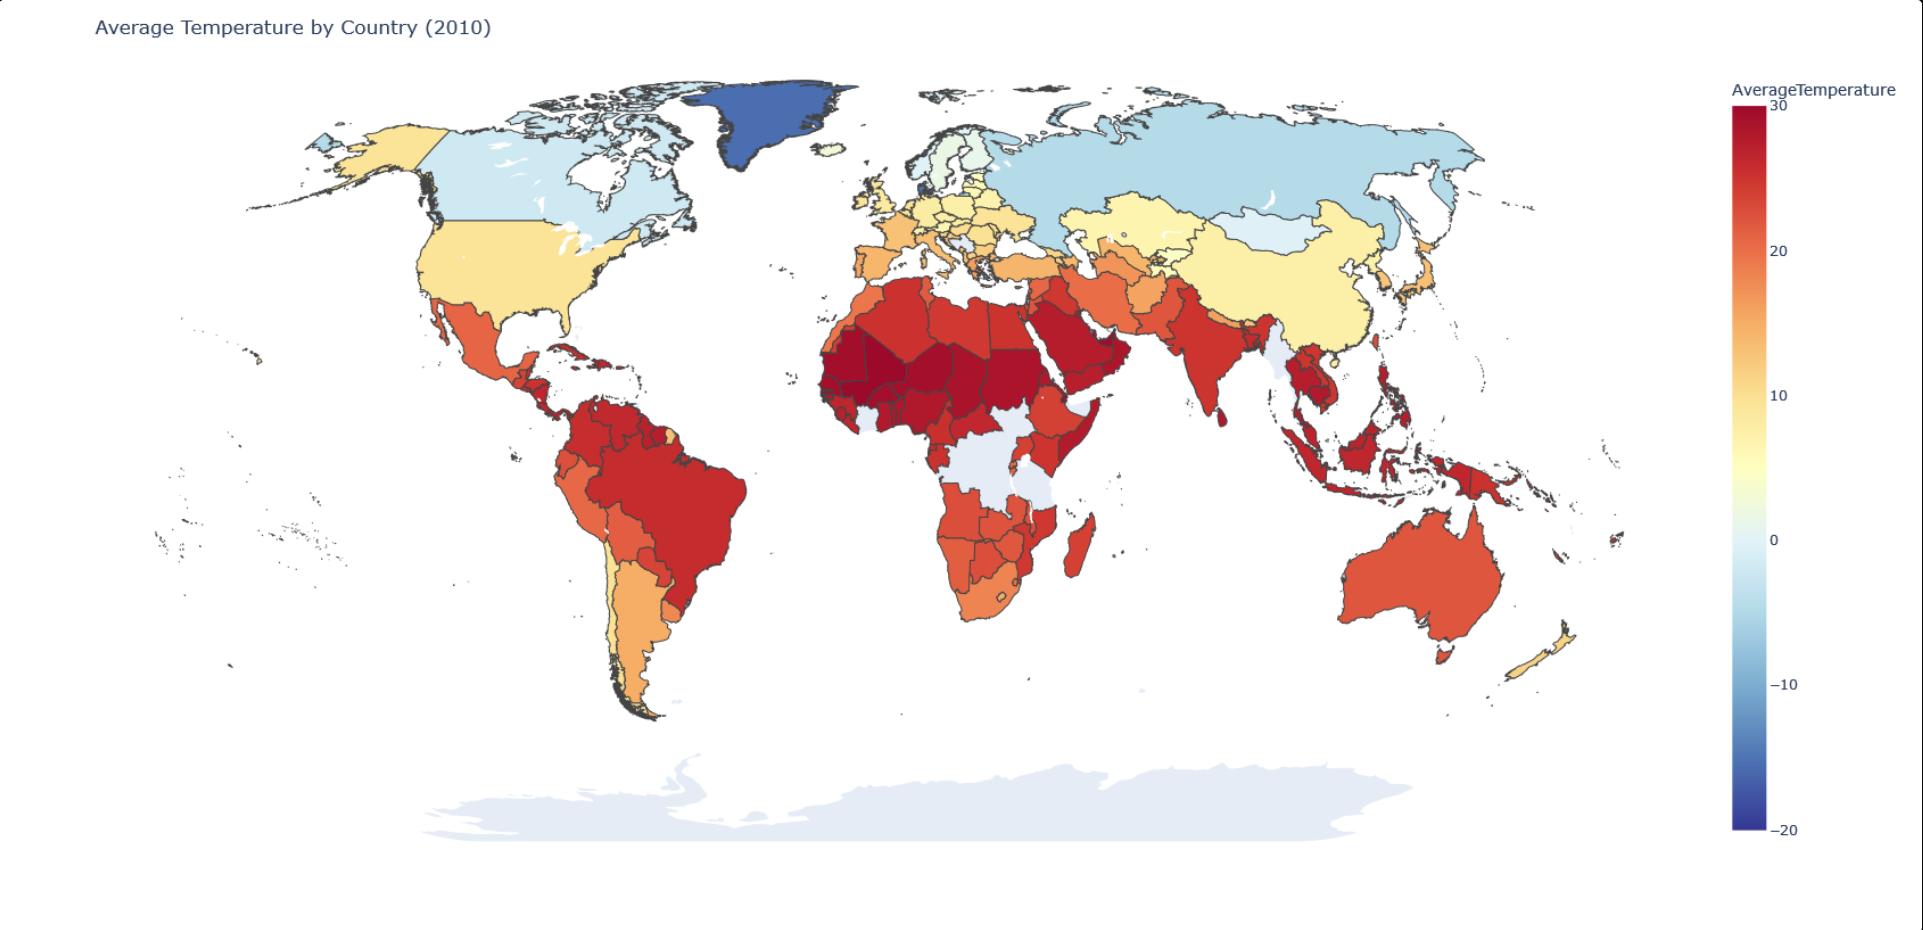
Figure 4: \
This graph shows the average temperature by country in 2010. With dark red countries as the hottest and dark blue the coldest countries.

In [ ]:
df = pd.read_csv("average_temperatures_1950.csv", encoding='latin1')


df['Country'] = df['Country'].replace('United States', 'United States of America')

gdf = gpd.read_file('countries.geojson')

merged = gdf.merge(df, left_on='ADMIN', right_on='Country')

fig = px.choropleth(merged,
                    geojson=merged.geometry,
                    locations=merged.index,
                    color='AverageTemperature',
                    color_continuous_scale='RdYlBu_r',
                    range_color=(-20, 30),
                    projection='natural earth')

fig.update_layout(title_text='Average Temperature by Country (1950)',
                  geo=dict(showframe=False,
                           showcoastlines=False,
                           projection_type='natural earth'))

fig.show()

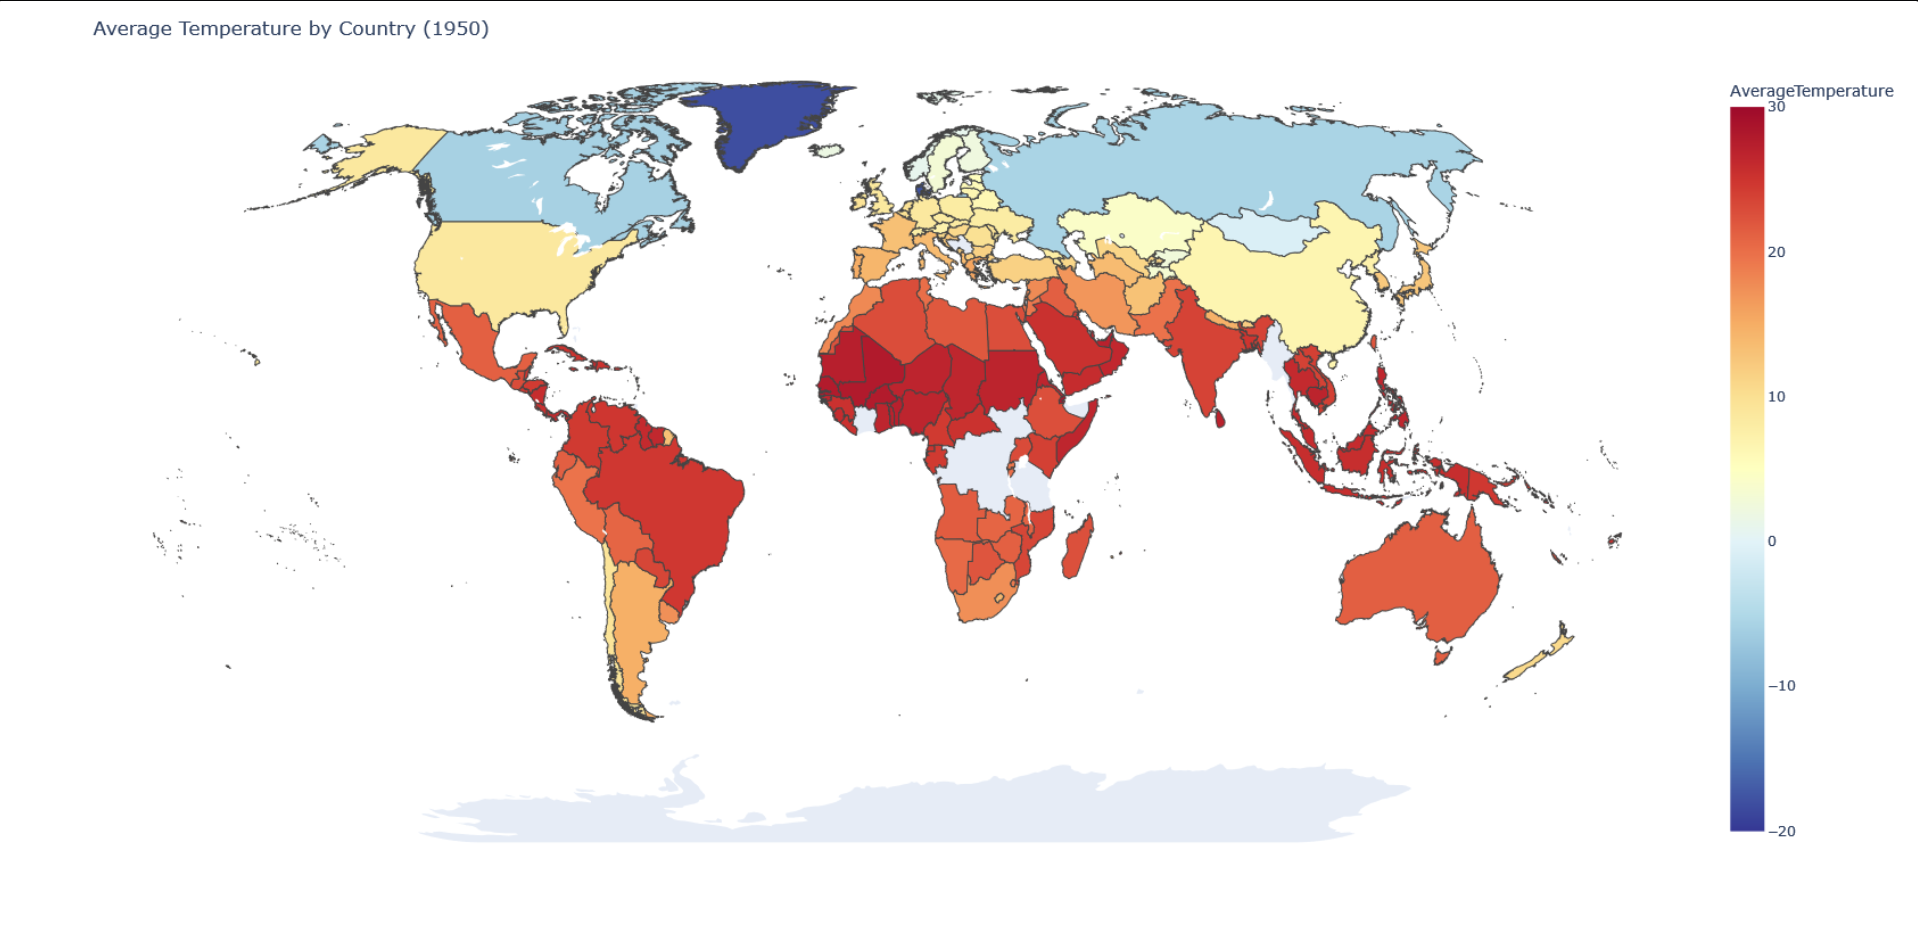
Figure 5: \
This graph shows the average temperature by country in 1950. With dark red countries as the hottest and dark blue the coldest countries.

In [12]:
df = pd.read_csv("WorldEnergyConsumption.csv")

df['continent'] = df['country'].apply(lambda x: x.split(", ")[-1])

continents = ['Other Asia & Pacific', 'Africa', 'Europe', 'North America', 'South & Central America', 'Australia']

fig = sp.make_subplots(rows=3, cols=2, subplot_titles=continents)

for i, continent in enumerate(continents):
    df_continent = df[df['continent'] == continent]

    df_continent = df_continent[(df_continent['year'] >= 1950) & (df_continent['year'] <= 2015)]

    line = go.Scatter(x=df_continent['year'], y=df_continent['coal_consumption'] + 100, name=continent)

    fig.add_trace(line, row=(i // 2) + 1, col=(i % 2) + 1)

fig.update_layout(
    title="Coal Consumption by Continent (1950-2015)",
    xaxis_title="Year",
    yaxis_title="Coal Consumption in TWH",
    showlegend=True,
    height=800,
    width=1000,
)

fig.show()

Figure 6: \
This figure shows the average coal consumation per continent. 

In [ ]:
df_1950 = pd.read_csv("average_temperatures_1950.csv", encoding='latin1')

# Read the temperature data for 2010
df_2010 = pd.read_csv("average_temperatures_2010.csv", encoding='latin1')

# Merge the two DataFrames based on the 'Country' column
merged_df = df_1950.merge(df_2010, on='Country', suffixes=('_1950', '_2010'))

# Change the name of "United States" to "United States of America"
merged_df['Country'] = merged_df['Country'].replace('United States', 'United States of America')

# Calculate the temperature difference
merged_df['Temperature_Difference'] = merged_df['AverageTemperature_2010'] - merged_df['AverageTemperature_1950']

# Read the GeoJSON file and create a GeoDataFrame
gdf = gpd.read_file('countries.geojson')

# Merge the GeoDataFrame with the temperature data
merged_gdf = gdf.merge(merged_df, left_on='ADMIN', right_on='Country')

# Create a Plotly choropleth map
fig = px.choropleth(merged_gdf,
                    geojson=merged_gdf.geometry,
                    locations=merged_gdf.index,
                    color='Temperature_Difference',
                    color_continuous_scale='RdYlBu_r',
                    range_color=(merged_gdf['Temperature_Difference'].min(), merged_gdf['Temperature_Difference'].max()),
                    projection='natural earth')

# Customize the map layout
fig.update_layout(title_text='Temperature Difference between 1950 and 2010',
                  geo=dict(showframe=False,
                           showcoastlines=False,
                           projection_type='natural earth'))

# Display the map
fig.show()

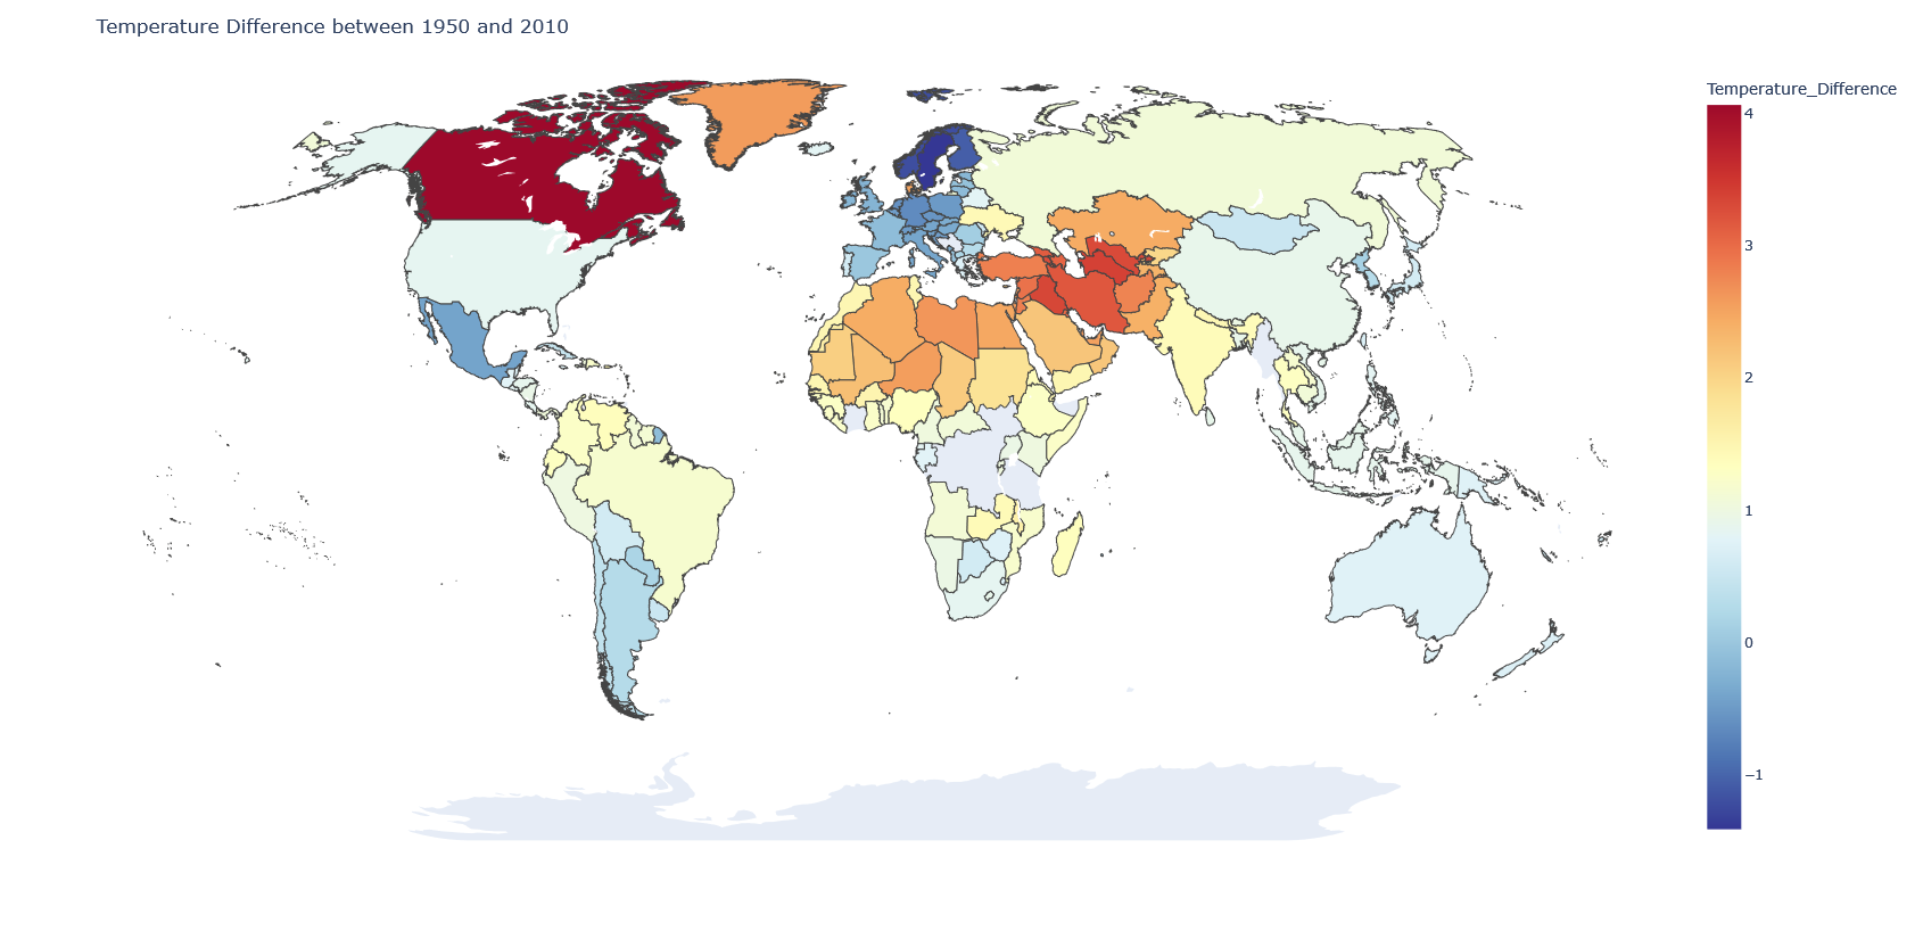
Figure 7: \
The figure shows the temperature increase from 1950 to 2010. With dark blue a decrease and dark red the biggest increase.

Index(['Year', 'Entity', 'Code', 'Net forest conversion'], dtype='object')


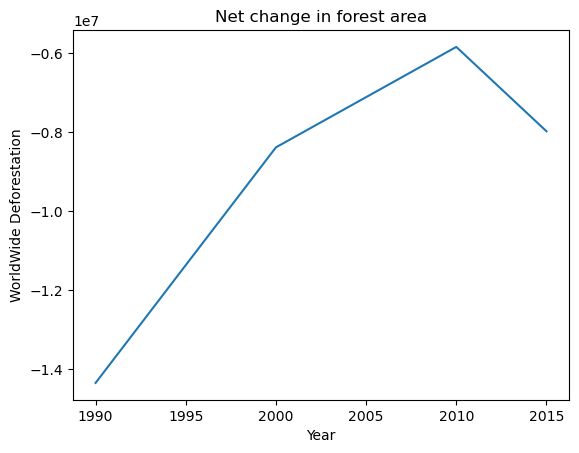

In [34]:
# Add all the values of the years together and keeping the column 'Year'
annual_forest_change = annual_forest_change.groupby(by='Year').sum().reset_index()


# Plotting the data
plt.plot(annual_forest_change['Year'], annual_forest_change['Net forest conversion'])
plt.title('Net change in forest area')
plt.xlabel('Year')
plt.ylabel('WorldWide Deforestation')
plt.show()

Figure 8: \
The figure shows the worldwide net change in forest area from 1990 to 2015.

# 4. Visions

### 4.1 Vision emission

The visualizations presented in Figures 1, 2, and 3 provide compelling evidence supporting the argument that energy consumption, particularly from fossil fuels, plays a significant role in global warming. Figure 1, a scatter plot, demonstrates a clear correlation between fossil fuel consumption and land average temperature. The upward trend in fossil fuel consumption from 1965 to 2015 corresponds to a noticeable increase in land average temperature, supporting the relationship between global energy usage and global warming. This finding is consistent with a 2001 study by researchers from the University of Illinois, which emphasized the human influence on the global climate.

Figure 2, a stacked bar chart, provides a comprehensive overview of the energy sources utilized by ten countries, highlighting the dominant role of fossil fuels in global energy consumption. The chart effectively portrays the heavy reliance on fossil fuels, with a substantial proportion allocated to them. This reliance contributes to the emission of greenhouse gases and exacerbates global warming. The smaller shares attributed to renewable and nuclear energy sources underscore the need to prioritize sustainable alternatives and reduce dependence on carbon-intensive fuels.

The line chart in Figure 3 showcases the increasing consumption of fossil fuel over time, indicating the rising energy demands and their implications for climate change. The significant growth in fossil fuel consumption within a span of 50 years aligns with the understanding that increasing energy consumption, primarily driven by fossil fuels, leads to higher greenhouse gas emissions. This emphasizes the urgency to address the environmental impact of energy consumption and transition to sustainable alternatives.

While Figure 3 reveals a slow growth in renewable energy source consumption since the late 1980s, it is important to note that fossil fuel consumption continues to rise. This suggests the presence of other factors influencing climate change beyond renewable energy sources. These factors may include deforestation, industrial emissions, and agricultural practices, which also contribute to greenhouse gas emissions and global warming.

Figures 4 and 5 also show that the average temperature has risen over the 60 years. A clear difference in colors is seen when comparing both globalmaps. Where 2010 is darker mostly in the most nordic countries but also in the countries around the equator.

In conclusion, the presented visualizations collectively demonstrate the significant impact of energy consumption, particularly from fossil fuels, on global warming. The correlation between fossil fuel consumption and land average temperature in Figure 1, the dominant role of fossil fuels in global energy consumption in Figure 2, and the increasing fossil fuel consumption over time in Figure 3 emphasize the need to transition to sustainable energy sources to mitigate greenhouse gas emissions and address the adverse effects of climate change. However, it is essential to recognize that addressing global warming requires comprehensive action that encompasses various contributing factors beyond energy consumption alone.

### 4.2 Vision other factors.

Figure 7 provides insightful data regarding the variations in temperature trends among different countries from 1950 to 2010. It is interesting to note that the temperature increase during this period has not been uniform across all nations. This raises questions about the factors influencing global warming.

Figure 8 provides some information about the deforestation going on in the world. Deforestation leads to warmer, drier conditions. In other words, deforestation contributes to climate change (Lawrence & Vandecar, 2015). We can see in figure 8 that there still is some deforestation, and it's even growing again. This is proof of another factor contributing to climate change.

If carbon dioxide (CO2) emissions were the sole driver of global warming, one would expect a consistent temperature rise in all countries. Since CO2 disperses globally after being emitted, its impact should be felt evenly. Even if CO2 remained localized to its emission source, we would anticipate similar temperature increases among neighboring or geographically clustered countries. However, the findings presented in Figure 7 challenge these assumptions.

For instance, Canada has experienced a significant temperature increase of approximately 4 degrees Celsius, while Greenland's temperature rise has been comparatively moderate, around 2.5 degrees Celsius. On the other hand, the United States' temperature rise has been relatively minimal. These disparities suggest that CO2 emissions alone cannot explain the observed temperature changes.

Denmark presents an intriguing case study. While its neighboring countries have witnessed a decrease in temperature over the same time span, Denmark has bucked the trend with a substantial temperature increase compared to the global average. This divergence from the expected pattern further supports the notion that emissions cannot solely account for global warming.

These irregular temperature trends strongly suggest the presence of additional factors contributing to the rise in global temperatures. While CO2 emissions undoubtedly play a significant role, there must be other influential variables that interact with CO2 to shape the observed temperature patterns. A study done in 2014 confirms this: humans are not the sole factor and in previous studies the influence on humans was overexaggerated. There is still some speculations as to what these other factors are exactly (Stern & Kaufmann; 2014).

Further investigations are required to identify these factors and understand their specific contributions to global warming. By uncovering the complex interplay between emissions, regional dynamics, atmospheric conditions, and other variables, we can gain a more comprehensive understanding of the forces driving climate change.

# 5. Discussion

When analyzing datasets and drawing conclusions about climate change, it is important to acknowledge that there may be certain inaccuracies that could impact the results. These inaccuracies can come from various sources, such as data collection methods, measurement errors and data gaps. It is crucial to be aware of these potential errors in order to maintain the validity of the analysis.

Firstly, data collection methods may introduce inaccuracies. Data is often collected through a network of monitoring stations positioned across the a country. However, the distribution and density of these stations might not be uniform, leading to spatial biases in the data. For instance, some regions may have fewer monitoring stations, which could result in incomplete representation of temperatures and energy use. Energy use can also be overlapped.

Additionally, measurement errors can occur during the data collection process. Instruments used to measure various climate parameters, such as temperature, precipitation, and atmospheric composition, may have inherent limitations and uncertainties. Factors like sensor calibration, maintenance issues, or environmental factors can introduce biases or inaccuracies into the recorded data. It is crucial to account for these potential errors when interpreting the results and drawing conclusions.

Another aspect to consider is the potential for biases in the data. Biases can be introduced through various means, such as measurement techniques, data selection, or the inclusion of certain variables. For example, if there is a bias towards urban areas in the data collection process, it may not accurately represent the overall climate trends, leading to inaccurate conclusions. It is important to be mindful of potential biases and apply appropriate statistical techniques to mitigate their impact.

Also, the data for figure five, six and seven was to broad. For validity more data from multiple years could have been used to make the figures more reliable. The years used could have been a really low or a very high from that decade. 

Finally, it is crucial to acknowledge the limitations of the tools used for data analysis and visualization, such as Python and Plotly. While these tools offer powerful capabilities, the accuracy of the final figures and visualizations heavily relies on the correct implementation of the code and the appropriate interpretation of the data. Inaccuracies can arise from errors in the coding process, incorrect assumptions made during analysis, or misinterpretation of the plotted data. Double-checking the code, validating the results against known benchmarks, and ensuring the accuracy of the figures can help mitigate these potential inaccuracies.

# 6. Reflection and work distribution

We mostly decided ourselves on what we could do better during the progression of our project since we didn't really receive any meaningful feedback on our work. What really worked well for us was making lots of graphs and other forms of data visualization, and then deciding afterwards which of the visualizations were best. Using this elimination technique, it was much easier for us to find graphs that could support our different perspectives. The main area of improvement we could have made was having better communication between our group members.

Since our group was assembled a bit late, two of us (Lev and Sem) made the proposal, and the two group members (Ezra and Arthur) who joined later worked on the draft. The final part of the assignment was divided pretty well between the four of us.

# 7. Sources

Lawrence, D., Vandecar, K. Effects of tropical deforestation on climate and agriculture. Nature Clim Change 5, 27–36 (2015). https://doi.org/10.1038/nclimate2430

Stern, D.I., Kaufmann, R.K. Anthropogenic and natural causes of climate change. Climatic Change 122, 257–269 (2014). https://doi.org/10.1007/s10584-013-1007-x

Wuebbles, D. J., & Jain, A. K. (2001). Concerns about climate change and the role of fossil fuel use. Fuel processing technology, 71(1-3), 99-119. https://doi.org/10.1016/S0378-3820(01)00139-4

# 8. Chatgpt

We used Chatgpt for rewriting and grammar checking purposes for parts of our text, we also used it to write tedious code like some parts of the preprocessing. Chatgpt was also used for finding information about python libraries like geopandas and corresponding functions. 

link to repository: https://github.com/levhulsbergen/datastory